In [370]:
import cv2 as cv
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import random
plt.rcParams['figure.figsize'] = [12, 8]

main_path_input_string = "/Users/studia/projekty/LEGO/LEGO_renders"
main_path_output_string = "/Users/studia/projekty/LEGO/LEGO_renders_out"
images_path_string = "/Users/studia/projekty/LEGO/LEGO PGR/flash"

def get_random_image_path():
    random_directory = random.choice([x for x in Path(images_path_string).glob("*")])
    images = [x for x in random_directory.glob("*.*")]
    return random.choice(images) if len(images) > 0 else get_random_image_path()

def get_random_image():
    random_image_path = get_random_image_path()
    return cv.imread(str(random_image_path.absolute()))

def get_image_from_path(path):
    return cv.imread(str(path.absolute()))

def find_contours(image, threshold, color_option = cv.COLOR_BGR2GRAY):
    image_gray = cv.cvtColor(image, color_option)
    image_gray = cv.blur(image_gray, (3,3))
    canny_output = cv.Canny(image_gray, threshold, threshold * 2)
    contours, _ = cv.findContours(canny_output, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    return contours

def rectangle_area(contour):
    rectangle = cv.boundingRect(contour)
    return rectangle[2] * rectangle[3]

def draw_contours(image, contours, option = 2):
    boundingRects = [cv.boundingRect(x) for x in contours]
    
    for rect in boundingRects:
        color = (256, 256, 256)
        cv.rectangle(image, (int(rect[0]), int(rect[1])), (int(rect[0]+rect[2]), int(rect[1]+rect[3])), color, option)
    
    return image
    
def draw_bounding_rects(image, threshold, color_option = cv.COLOR_BGR2GRAY): 
    contours_original_image = find_contours(image, threshold, color_option)
    drawing = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    drawing = draw_contours(drawing, contours_original_image, cv.FILLED)
    contours_mask = find_contours(drawing, threshold)
    
    if len(contours_mask) == 0:
        raise Exception("Empty render!")
        
    image_with_box = draw_contours(image, [max(contours_mask, key = rectangle_area)])
    return image_with_box

In [377]:
def process_recursive(path):
    for file in path.glob("*"):
        if file.is_file() and ".png" in str(file).lower():
            print("Processing ", str(file))
            image = get_image_from_path(file)
            try:
                image = draw_bounding_rects(image, 15, color_option=cv.COLOR_BGR2HLS)
                cv.imwrite(str(Path(main_path_output_string) / file.name), image)
            except Exception as e:
                print("Empty render: ", file)
        elif file.is_dir():
            print("Creating new directory")
            Path(str(file).replace(main_path_input_string, main_path_output_string)).mkdir(parents=True, exist_ok=True)
            process_recursive(file)

process_recursive(Path(main_path_input_string))

Creating new directory
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_1_1587609056.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_9_1587609133.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_0_1587609042.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_8_1587609122.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_5_1587609094.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_4_1587609084.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_2_1587609067.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_3_1587609075.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/80395/80395_Dark Stone Grey_6_158760

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_5_1587532803.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_3_1587532783.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_4_1587532793.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_2_1587532772.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_9_1587532843.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_7_1587532824.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_1_1587532762.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/32138/32138_Nougat_8_1587532834.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/6628/6628_Dark Orange_2_1587602268.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/6628/6628_Dark Orange_0_158760

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_9_1587506359.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_4_1587506127.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_0_1587505921.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_6_1587506230.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_3_1587506083.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_2_1587506037.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_1_1587505978.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2618/2618_White Glow_5_1587506180.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/50914/50914_Bright Yellowish-Green_1_1587576872.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/5

Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_4_1587569825.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_7_1587569886.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_9_1587569923.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_0_1587569749.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_5_1587569844.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_1_1587569769.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_8_1587569905.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_3_1587569801.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_2_1587569783.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4716/4716_Black_6_1587569866.png
Creating new directory
Proc

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4524/4524_Bright Yellowish-Green_0_1587565700.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_8_1587494743.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_4_1587494669.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_0_1587494584.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_1_1587494608.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_3_1587494644.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_2_1587494627.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294/20294_Spring Yellowish Green_7_1587494721.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/20294

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/99617/99617_Medium-Yellowish green_7_1587629283.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/99617/99617_Medium-Yellowish green_2_1587629232.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/99617/99617_Medium-Yellowish green_9_1587629303.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/99617/99617_Medium-Yellowish green_6_1587629273.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/99617/99617_Medium-Yellowish green_5_1587629262.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/10091/10091_Bright Yellow_3_1587483823.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/10091/10091_Bright Yellow_9_1587483887.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/10091/10091_Bright Yellow_5_1587483847.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/10091/10091_Bright Yellow_1_15

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_6_1587636732.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_0_1587636656.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_1_1587636671.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_8_1587636759.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_5_1587636716.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_4_1587636706.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_7_1587636749.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9230/u9230_Light Royal Blue_9_1587636771.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/556/556_Medium Blue_1_1587581513.png
Processing  /U

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_7_1587582045.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_1_1587581869.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_6_1587582018.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_5_1587581991.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_4_1587581964.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_2_1587581903.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_9_1587582105.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/55805/55805_Medium-Yellowish green_8_1587582073.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/287

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_1_1587549562.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_5_1587549642.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_4_1587549618.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_8_1587549697.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_2_1587549586.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_9_1587549719.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_0_1587549535.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/408523/408523_Light Royal Blue_7_1587549683.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/6079/6079_Medium Stone Grey_8_15875

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/790/790_Cool Yellow_9_1587608764.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_0_1587492394.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_3_1587492441.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_9_1587492547.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_2_1587492426.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_8_1587492534.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_7_1587492511.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_6_1587492498.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/18654/18654_Medium Blue_4_1587492459.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/r

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/41250/41250_Bright Blue_8_1587551408.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/41250/41250_Bright Blue_4_1587551362.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/41250/41250_Bright Blue_5_1587551373.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_0_1587583130.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_5_1587583180.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_2_1587583150.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_3_1587583157.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_4_1587583168.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Earth Green_1_1587583140.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/569/569_Eart

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_7_1587496537.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_6_1587496523.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_8_1587496554.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_2_1587496453.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_4_1587496485.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_1_1587496434.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/22392/22392_Lavender_9_1587496569.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30657/30657_Sand Yellow_0_1587528014.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30657/30657_Sand Yellow_5_1587528063.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30657/306

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_4_1587558598.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_5_1587558607.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_3_1587558586.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_2_1587558578.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_9_1587558646.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_7_1587558626.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_1_1587558569.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4270181/4270181_Medium Azur_8_1587558635.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/104/104_Dark Stone Grey_8_1587484339.png
raising excpetion


raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_7_1587606749.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_2_1587606664.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_2_1587606664.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_6_1587606732.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_6_1587606732.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_1_1587606644.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_1_1587606644.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_9_1587606782.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/752/752_Olive Green_9_1587606782.png
Proc

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_1_1587587725.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_3_1587587747.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_5_1587587769.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_6_1587587779.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_2_1587587736.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_7_1587587790.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_8_1587587800.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/604615/604615_Light Nougat_9_1587587811.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u8006b/u8006b_Bright Red_8_1587631001.png
Processing  /Users/studia

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_1_1587588437.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_9_1587588524.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_7_1587588500.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_8_1587588512.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_6_1587588488.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_4_1587588466.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60581/60581_White Glow_5_1587588476.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2040/2040_Bright Reddish Violet_6_1587494888.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2040/2040_Bright Reddish Violet_5_1587494877.png
Processing  /Users/studia/projekty/LEGO/L

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_5_1587560203.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_2_1587560173.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_9_1587560242.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_3_1587560183.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_4_1587560194.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_0_1587560153.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_7_1587560224.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4343/4343_Aqua_8_1587560234.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/11186/11186_Dark Green_9_1587484966.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/11186/11186_Dark Green_8_1587484960.png
Processing  /Users/st

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_8_1587571627.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_9_1587571646.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_3_1587571541.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_4_1587571557.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_0_1587571481.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_5_1587571577.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_1_1587571501.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/47501/47501_Sand Yellow_7_1587571614.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/42073/42073_Bright Bluish Green_6_1587555825.png
Processing  /Users/studia/projekty/LEGO/LE

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60747/60747_Bright Yellow_3_1587589582.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60747/60747_Bright Yellow_5_1587589626.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/60747/60747_Bright Yellow_1_1587589550.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_0_1587515870.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_7_1587516188.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_5_1587516101.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_9_1587516298.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_6_1587516139.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30037/30037_Medium Azur_3_1587516006.png
Processing  /Users/studia/projekty/LEGO/LEGO

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/96490/96490_Light Royal Blue_6_1587625232.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/96490/96490_Light Royal Blue_0_1587625111.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/96490/96490_Light Royal Blue_8_1587625271.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/96490/96490_Light Royal Blue_3_1587625174.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/96490/96490_Light Royal Blue_5_1587625213.png
Creating new directory
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3708/3708_Nougat_1_1587543366.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3708/3708_Nougat_1_1587543366.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3708/3708_Nougat_3_1587543407.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3708/3708_Nougat_3_158

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_2_1587632918.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_7_1587633079.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_6_1587633043.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_9_1587633146.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_1_1587632887.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9033/u9033_Bright Yellowish-Green_0_1587632850.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/71076a/71076a_Light Purple_0_1587604059.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/71076a/71076a_Light Purple_1_1587604073.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/71076a/71076a_Light

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2844/2844_Bright Reddish Violet_4_1587511128.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2844/2844_Bright Reddish Violet_5_1587511138.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2844/2844_Bright Reddish Violet_6_1587511149.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/2844/2844_Bright Reddish Violet_7_1587511159.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3996/3996_Nougat_3_1587547575.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3996/3996_Nougat_9_1587547739.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3996/3996_Nougat_8_1587547716.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3996/3996_Nougat_2_1587547563.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3996/3996_Nougat_0_1587547506.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3737/3737_White_6_1587543838.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3737/3737_White_1_1587543736.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3737/3737_White_2_1587543756.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3737/3737_White_8_1587543877.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3737/3737_White_4_1587543804.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30030/30030_Lavender_5_1587515696.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30030/30030_Lavender_5_1587515696.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30030/30030_Lavender_9_1587515740.png
raising excpetion
Empty render:  /Users/studia/projekty/LEGO/LEGO_renders/render_2/30030/30030_Lavender_9_1587515740.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_7_1587506981.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_6_1587506951.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_5_1587506917.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_1_1587506787.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_9_1587507048.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/26531/26531_Bright Green_0_1587506751.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/42074/42074_Bright Bluish Green_8_1587555759.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/42074/42074_Bright Bluish Green_3_1587555717.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/42074/42074_Bright Bluish Green_2_1587555712.png
Processing  /Users/s

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_3_1587640197.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_6_1587640290.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_7_1587640330.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_4_1587640233.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_1_1587640147.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_8_1587640352.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/u9468/u9468_Light Nougat_9_1587640381.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3195/3195_Nougat_3_1587530439.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/3195/3195_Nougat_2_1587530410.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/rend

Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/4774/4774_Bright Blue_0_1587572405.png
Creating new directory
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_0_1587594509.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_3_1587594543.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_4_1587594553.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_1_1587594523.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_7_1587594583.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_8_1587594594.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_2_1587594534.png
Processing  /Users/studia/projekty/LEGO/LEGO_renders/render_2/62271/62271_Bright Bluish Green_9_158

KeyboardInterrupt: 

In [355]:
Path(main_path_string) / Path(main_path_string).name

PosixPath('/Users/studia/projekty/LEGO/LEGO_renders/LEGO_renders')

Found:  /Users/studia/projekty/LEGO/LEGO_renders/render_1/98382/98382_White Glow_7_1587397645.png


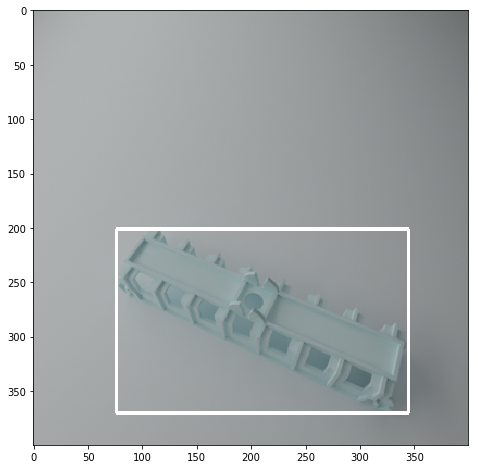

'4.2.0'